In [1]:
from joblib import load, dump
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
X_train, y_train = load("../../../preprocessing/original_train.joblib")
X_test, y_test = load("../../../preprocessing/original_test.joblib")

In [8]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, 
                                                        train_size=0.1, 
                                                        stratify=y_train,
                                                        random_state=42)

In [4]:
param_grid_dt = {"max_depth": [4, 6, 8, 12],
                 "criterion": ["gini", "entropy"]}
param_grid_rf = {"n_estimators": [100, 150],
                 "max_depth": [4, 6, 8, 12],
                 "criterion": ["gini", "entropy"]}

In [5]:
dt_clf = DecisionTreeClassifier(random_state=0)
grid_search_dt = GridSearchCV(dt_clf, param_grid_dt)
grid_search_dt.fit(X_train_sample, y_train_sample)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12]})

In [6]:
print("Best parameters for Decision Tree: ", grid_search_dt.best_params_)
print("Best score for Decision Tree: ", grid_search_dt.best_score_)

Best parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 12}
Best score for Decision Tree:  0.7026714285714286


In [8]:
def report(model, x, y, set):
    y_pred = model.predict(x)

    print(set)
    print("---------------------------------------------------------------------------------")
    print("Classification report:")
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))

    print("---------------------------------------------------------------------------------")
    print("Confusion matrix:")
    print("---------------------------------------------------------------------------------")
    print(confusion_matrix(y, y_pred))

In [8]:
report(grid_search_dt.best_estimator_,X_train_sample,y_train_sample,'Train set')

Train set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70    361961
         1.0       0.74      0.75      0.74    408039

    accuracy                           0.73    770000
   macro avg       0.72      0.72      0.72    770000
weighted avg       0.73      0.73      0.73    770000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[251796 110165]
 [101038 307001]]


In [9]:
report(grid_search_dt.best_estimator_,X_test,y_test,'Test set')

Test set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68   1551263
         1.0       0.72      0.73      0.72   1748737

    accuracy                           0.70   3300000
   macro avg       0.70      0.70      0.70   3300000
weighted avg       0.70      0.70      0.70   3300000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[1044445  506818]
 [ 468398 1280339]]


In [10]:
rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1)
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf)
grid_search_rf.fit(X_train_sample, y_train_sample)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12],
                         'n_estimators': [100, 150]})

In [11]:
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best score for Random Forest: ", grid_search_rf.best_score_)

Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 150}
Best score for Random Forest:  0.7185207792207792


In [12]:
report(grid_search_rf.best_estimator_,X_train_sample,y_train_sample,'Train set')

Train set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72    361961
         1.0       0.74      0.78      0.76    408039

    accuracy                           0.74    770000
   macro avg       0.74      0.74      0.74    770000
weighted avg       0.74      0.74      0.74    770000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[252279 109682]
 [ 89192 318847]]


In [13]:
report(grid_search_rf.best_estimator_,X_test,y_test,'Test set')

Test set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69   1551263
         1.0       0.72      0.76      0.74   1748737

    accuracy                           0.72   3300000
   macro avg       0.72      0.72      0.72   3300000
weighted avg       0.72      0.72      0.72   3300000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[1044794  506469]
 [ 422190 1326547]]


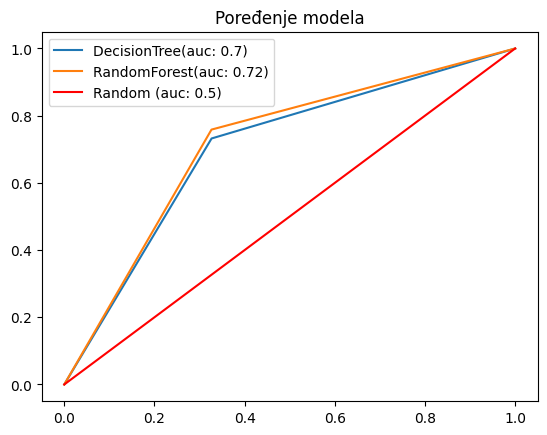

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [grid_search_dt.best_estimator_, grid_search_rf.best_estimator_]
model_names = ['DecisionTree', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

In [16]:
dump(models, 'decision_trees.joblib')

['decision_trees.joblib']

In [3]:
dt_clf = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=12)

In [5]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)

In [9]:
report(dt_clf,X_train,y_train,'Train set')

Train set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70   3619614
         1.0       0.73      0.73      0.73   4080386

    accuracy                           0.72   7700000
   macro avg       0.71      0.71      0.71   7700000
weighted avg       0.72      0.72      0.72   7700000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[2516488 1103126]
 [1084520 2995866]]


In [10]:
report(dt_clf,X_test,y_test,'Test set')

Test set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69   1551263
         1.0       0.73      0.73      0.73   1748737

    accuracy                           0.71   3300000
   macro avg       0.71      0.71      0.71   3300000
weighted avg       0.71      0.71      0.71   3300000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[1072498  478765]
 [ 471302 1277435]]


In [11]:
rf_clf = RandomForestClassifier(random_state=0,max_depth=12,n_estimators=150,criterion='gini',n_jobs=-1)

In [12]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=150, n_jobs=-1,
                       random_state=0)

In [13]:
report(rf_clf,X_train,y_train,'Train set')

Train set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70   3619614
         1.0       0.73      0.76      0.74   4080386

    accuracy                           0.72   7700000
   macro avg       0.72      0.72      0.72   7700000
weighted avg       0.72      0.72      0.72   7700000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[2460211 1159403]
 [ 970600 3109786]]


In [14]:
report(rf_clf,X_test,y_test,'Test set')

Test set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.68      0.69   1551263
         1.0       0.72      0.76      0.74   1748737

    accuracy                           0.72   3300000
   macro avg       0.72      0.72      0.72   3300000
weighted avg       0.72      0.72      0.72   3300000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[1048233  503030]
 [ 423201 1325536]]


In [16]:
dt_clf_sam, rf_clf_sam = load('decision_trees.joblib')

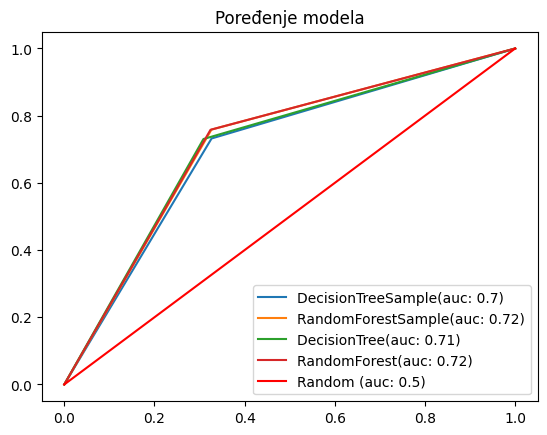

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dt_clf_sam, rf_clf_sam,dt_clf,rf_clf]
model_names = ['DecisionTreeSample', 'RandomForestSample', 'DecisionTree', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

In [18]:
dump(models, 'decision_trees.joblib')

['decision_trees.joblib']

In [2]:
_, _,_,rf_clf = load('decision_trees.joblib')

In [5]:
feature_importances = rf_clf.feature_importances_
column_names = X_train.columns

In [6]:
feature_importances

array([0.03657826, 0.0013959 , 0.00042151, 0.03424509, 0.0004325 ,
       0.0787215 , 0.00210357, 0.0004217 , 0.01290513, 0.02967775,
       0.0010896 , 0.00042442, 0.00597107, 0.01170251, 0.00083841,
       0.00042354, 0.00303557, 0.00799585, 0.0008938 , 0.00043094,
       0.00282865, 0.02438133, 0.09539926, 0.00590199, 0.07884997,
       0.28953374, 0.1283998 , 0.14499665])

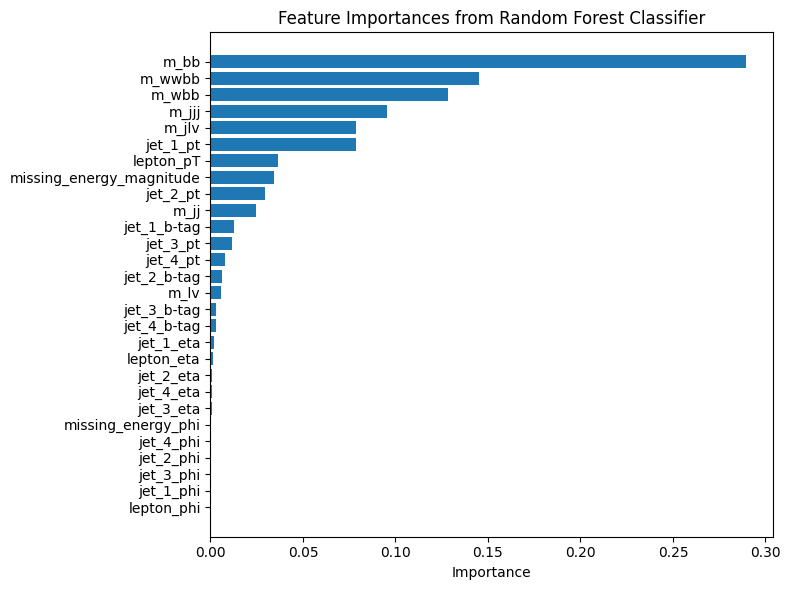

In [22]:
plt.figure(figsize=(8, 6))

sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')

plt.yticks(range(len(sorted_idx)), [column_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')

plt.tight_layout()
plt.show()